In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [6]:
train_path = 'E:/ML/train'
valid_path = 'E:/ML/test'

In [7]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [8]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [9]:
 # useful for getting number of classes
folders = glob('E:/ML/train/*')

In [10]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [13]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:/ML/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1557 images belonging to 2 classes.


In [16]:
test_set = test_datagen.flow_from_directory('E:/ML/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [17]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/3
49/49 [==============================] - 2539s 52s/step - loss: 0.2301 - accuracy: 0.9037 - val_loss: 0.2311 - val_accuracy: 0.8718
Epoch 2/3
49/49 [==============================] - 2414s 49s/step - loss: 0.1219 - accuracy: 0.9557 - val_loss: 0.2343 - val_accuracy: 0.8862
Epoch 3/3
49/49 [==============================] - 2473s 50s/step - loss: 0.1021 - accuracy: 0.9621 - val_loss: 0.0877 - val_accuracy: 0.8830


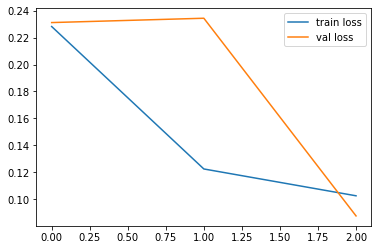

<Figure size 432x288 with 0 Axes>

In [20]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

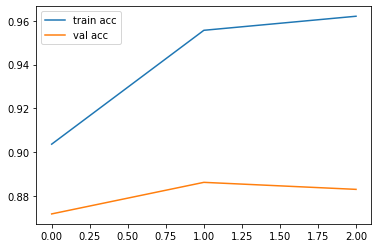

<Figure size 432x288 with 0 Axes>

In [21]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
import tensorflow as tf

In [23]:
from keras.models import load_model

In [24]:
model.save('model_vgg19.h5')

In [25]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.h5')

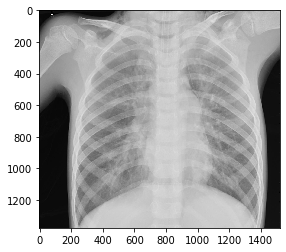

In [26]:
#FirstTest

filepath = 'E:/ML/train/PNEUMONIA/person111_virus_209.jpeg'
img_array = cv2.imread(filepath)
plt.imshow(img_array)

In [27]:
#FirstTest

img = image.load_img(filepath,target_size=(224, 224))
x = image.img_to_array(img)

y = np.expand_dims(x, axis=0)
img_data = preprocess_input(y)

test = model.predict(img_data)
CATEGORIES=['PNEMONIA','NORMAL']
print(CATEGORIES[int(test[0][0])])

PNEMONIA


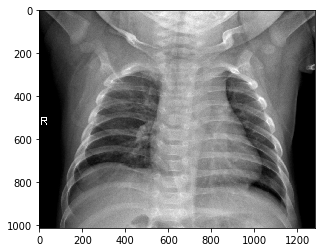

In [28]:
#SecondTest

filepath = 'E:/ML/train/NORMAL/NORMAL2-IM-0449-0001.jpeg'
img_array = cv2.imread(filepath)
plt.imshow(img_array)

In [29]:
#SecondTest
img = image.load_img(filepath,target_size=(224, 224))
x = image.img_to_array(img)

y = np.expand_dims(x, axis=0)
img_data = preprocess_input(y)

test = model.predict(img_data)
CATEGORIES=['PNEMONIA','NORMAL']
print(CATEGORIES[int(test[0][0])])

NORMAL
